## Case Study on Supervised Learning

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset to the python environment.

In [2]:
# Importing the given dataset
data = pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Here, in the dataset, SL : Sepal Length, SW : Sepal Width, PL : Petal Length, and PW : Petal Width

In [3]:
# The shape i.e., the number of rows and columns, of the dataset is:
data.shape

(150, 5)

In [4]:
# The columns in the dataset are:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
# The concise summary of the dataset is given as:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2. Do necessary pre-processing steps.

#### Checking for Null Values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

The total number of rows is given as 150. As per the concise summary, only two columns have 150 non-null values. Other three columns (SL, SW, and PL) have null values. This is further confirmed using the 'Missing Values Detection' command.

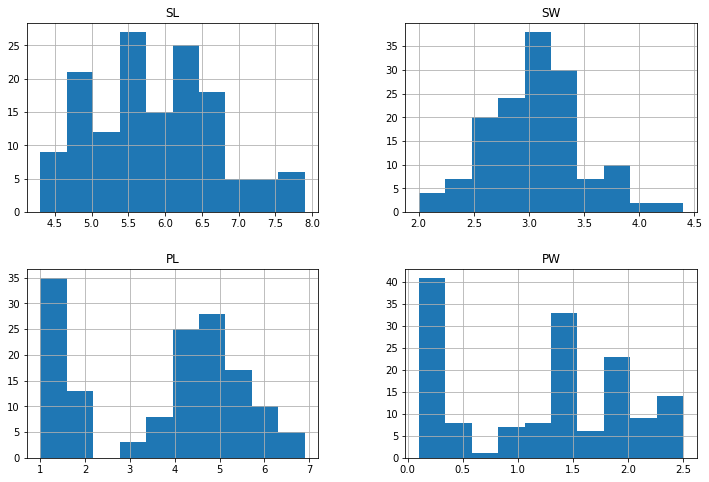

In [7]:
# Handling these missing values
# The data in each column is checked for skewness.
freqgph=data
freqgph.hist(figsize=(12,8))
plt.show()

In [8]:
# The missing values, thereby, can be replaced with either with the mean or median value accordingly.
data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('mean'))
data['SW'] = data['SW'].fillna(data.groupby('Classification')['SW'].transform('mean'))
data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

It can be seen that there are no missing values now.

#### Checking for Outliers

<AxesSubplot:xlabel='SW'>

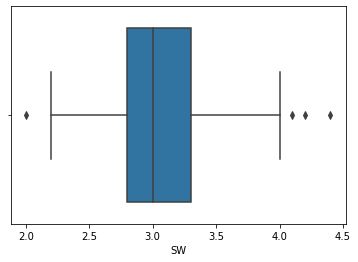

In [10]:
sns.boxplot(x='SW',data=data)

In [11]:
q1 = np.percentile(data['SW'],25,interpolation='midpoint')
q2 = np.percentile(data['SW'],50,interpolation='midpoint')
q3 = np.percentile(data['SW'],75,interpolation='midpoint')

print('The Q1 value:',q1)
print('The Q2 value:',q2)
print('The Q3 value:',q3)

IQR = q3-q1
lowlim = q1-(1.5*IQR)
uplim = q3+(1.5*IQR)

print('The values  of SW less than',lowlim,'and greater than',uplim,'are outliers.')

The Q1 value: 2.8
The Q2 value: 3.0
The Q3 value: 3.3
The values  of SW less than 2.05 and greater than 4.05 are outliers.


In [12]:
outlier=[]
for x in data["SW"]:
    if x > uplim or x < lowlim:
        outlier.append(x)
print(outlier)
print(len(outlier))

[4.4, 4.1, 4.2, 2.0]
4


The number of outliers in the SW column is 4. They are 4.4, 4.1, 4.2 and 2.0.

In [13]:
ind1,ind2=data['SW'] > uplim, data['SW'] < lowlim
i1=data.loc[ind1].index
i2=data.loc[ind2].index
print(i1)
print(i2)

Int64Index([15, 32, 33], dtype='int64')
Int64Index([60], dtype='int64')


The indices of those outliers are '15', '32', '33', and '60'.

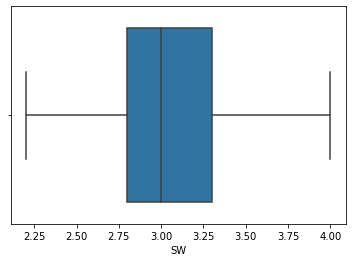

In [14]:
# Those outliers can be dropped.
data.drop([15, 32, 33,60],inplace=True)
sns.boxplot(data['SW'])
plt.show()

The same process can be repeated for other columns

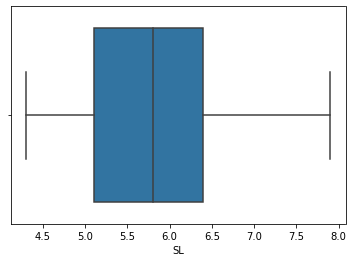

In [15]:
sns.boxplot(data['SL'])
plt.show()

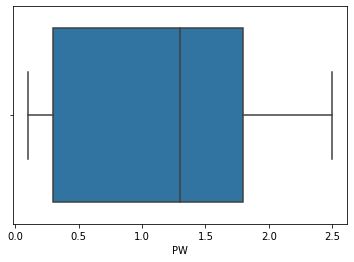

In [16]:
sns.boxplot(data['PW'])
plt.show()

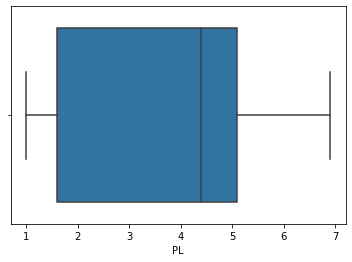

In [17]:
sns.boxplot(data['PL'])
plt.show()

It can been seen that there are no outliers in these three columns.

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [18]:
# Label Encoding
# Splitting the dataset into target and features

x = data.drop(['Classification'],axis=1)
y = pd.DataFrame(data['Classification'])

from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()
data['Classification'] = lab_en.fit_transform(data['Classification'])

data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.008511,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,5.55,2.0,2
148,6.200000,3.4,5.40,2.3,2


In [19]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

#### 1. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,recall_score

dt_mdl = DecisionTreeClassifier()
dt_mdl.fit(x_train,y_train)
y_pred = dt_mdl.predict(x_test)

print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459


#### 2. Support Vector Machine (SVM)

#### Kernel based SVM

In [21]:
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.972972972972973
Precision is:  0.972972972972973
Recall is:  0.972972972972973
F1 score is:  0.972972972972973


#### RBF based SVM

In [22]:
from sklearn.svm import SVC

svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'weighted'))

Accuracy is:  0.918918918918919
Precision is:  0.9410319410319411
Recall is:  0.918918918918919
F1 score is:  0.9200321603067599


#### 3. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'weighted'))

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459


#### 4. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='liblinear',C=10.0,random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.972972972972973
Precision score is: 0.9749034749034748
Recall score is: 0.972972972972973
f1 score is: 0.9725725725725727


#### 5. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier as knn

acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)
    
classifier = knn(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)

print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


### It can be concluded from all the results that the KNN model gives out better prediction.